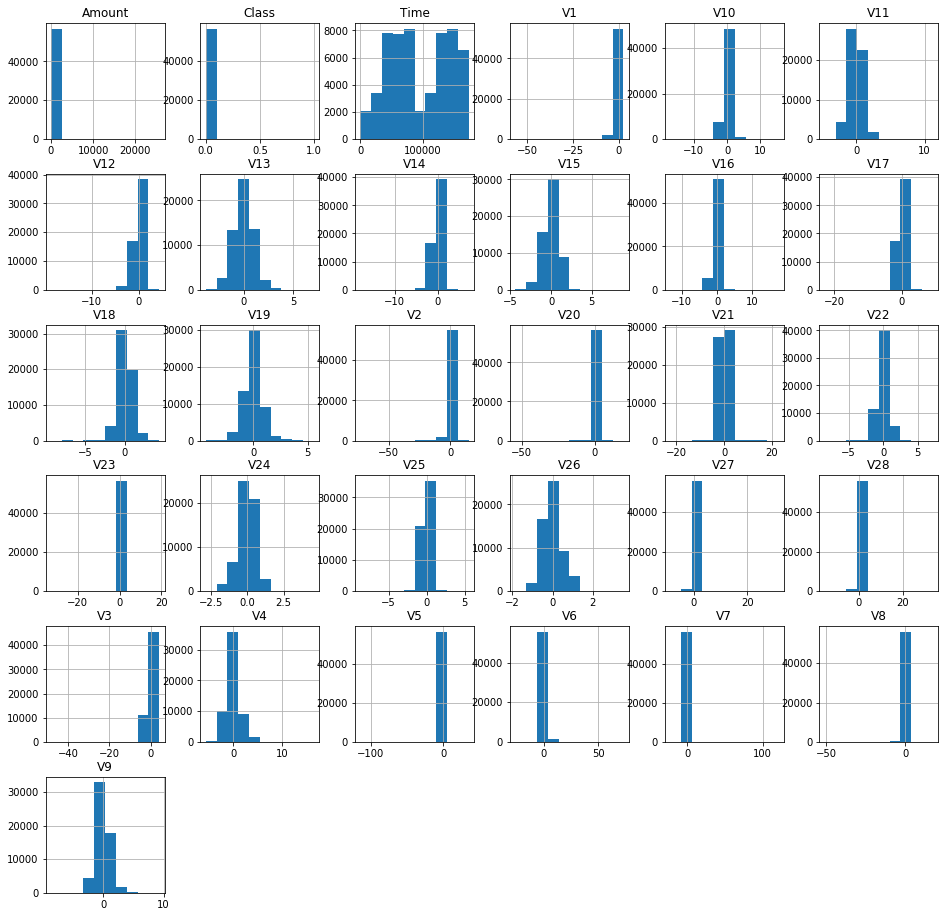

0.0017762926486106225
Fraud Cases : 101
Normal Cases : 56860
accuracy score: 99.31111485632425
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    142161
           1       0.14      0.61      0.23       243

    accuracy                           0.99    142404
   macro avg       0.57      0.80      0.61    142404
weighted avg       1.00      0.99      1.00    142404

KNN socre: 99.83076318080953


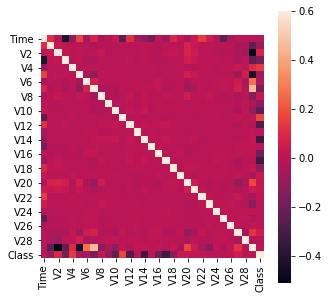

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


credit_card_df = pd.read_csv('./creditcard.csv')
# Considering a fraction of data to reduce computational time
data = credit_card_df.sample(frac=0.2, random_state=0)
data.shape
# Dataset plotting
data.hist(figsize=(16,16))
plt.show()
# Number of Fraud and valid transactions
Fraud = data[data['Class'] == 1]
Normal = data[data['Class'] == 0]
outlier_fraction = len(Fraud)/float(len(Normal))
print(outlier_fraction)
print("Fraud Cases :", len(Fraud))
print("Valid Cases :", len(Normal))

# Correlation Matrix
corr_mat = data.corr()
fig = plt.figure(figsize=(5,5))
sns.heatmap(corr_mat, vmax=0.6, square= True)

X_train = credit_card_df.drop("Class",axis=1)
Y_train = credit_card_df["Class"]
X_train, X_test, Y_train, Y_test= train_test_split(X_train, Y_train, test_size=0.5, random_state=0)
model = GaussianNB()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
score = accuracy_score(Y_test,y_pred)*100
print("accuracy score: " + str(score))
print(classification_report(Y_test, y_pred))

#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
score = knn.score(X_test,Y_test)*100
print("KNN socre: " + str(score))


0    284315
1       492
Name: Class, dtype: int64


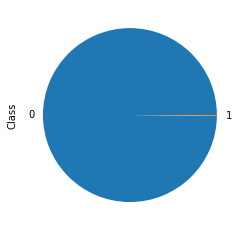

In [52]:
# visualization
print(credit_card_df["Class"].value_counts())
credit_card_df["Class"].value_counts().plot(kind='pie')


In [43]:
#handling unbalanced datasets
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state=state)
clf.fit(X_train)
scores = clf.decision_function(X_train)
y_pred = clf.predict(X_train)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

n_errors = (y_pred != Y_train).sum()
print('Isolation Forest: {}'.format(n_errors))
print('Accuracy Score: ', accuracy_score(Y_train, y_pred))
print('Classification Report: \n',classification_report(Y_train, y_pred))

Isolation Forest: 344
Accuracy Score:  0.9975843205550445
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    142154
           1       0.31      0.32      0.31       249

    accuracy                           1.00    142403
   macro avg       0.66      0.66      0.66    142403
weighted avg       1.00      1.00      1.00    142403

